 # Exploratory Data Analysis of listings Data Frame

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
# import clean dataset
listings_df = pd.read_pickle("data-clean/listings.pkl")


In [16]:
# SECTION: Exploratory Data Analysis
cols = [
    "price",
    "neighbourhood",
    "room_type",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
]

# exclude observations where price = 0
listings_red = listings_df[cols].loc[listings_df["price"] > 0]

 ## Most expensive neighbourhoods

In [17]:
price_by_nbhood = (
    listings_red.groupby("neighbourhood")
    .agg({"price": ["min", "mean", "max"]})
    .droplevel(level=0, axis="columns")
    .sort_values(by="mean", ascending=False)
)
price_by_nbhood


,min,mean,max
neighbourhood,,,
Nordstrand,200.0,2386.297101,87140.0
Marka,400.0,1629.411765,5000.0
Frogner,240.0,1504.261947,30000.0
Vestre Aker,350.0,1460.615385,13000.0
St. Hanshaugen,266.0,1261.211268,22786.0
Ullern,282.0,1246.803738,10000.0
Gamle Oslo,100.0,1205.551845,25000.0
Sentrum,363.0,1204.627907,4500.0
Stovner,355.0,1116.636364,2500.0


Text(0.5, 0.98, 'Log-Price Distribution')

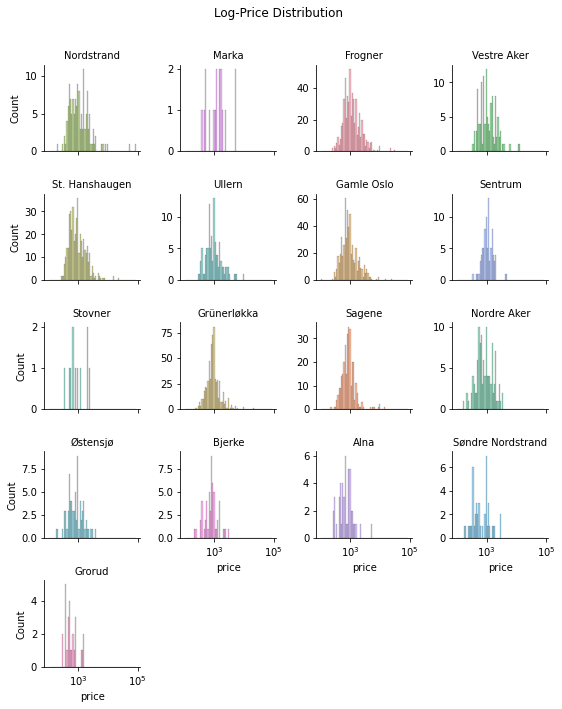

In [18]:
g = sns.displot(
    data=listings_red.loc[listings_red["price"] > 0],
    kind="hist",
    x="price",
    hue="neighbourhood",
    col="neighbourhood",
    col_wrap=4,
    log_scale=True,
    facet_kws=dict(sharey=False),
    legend=False,
    height=2,
    aspect=1,
    col_order=price_by_nbhood.index,
).set_titles(col_template="{col_name}")

fig = g.figure
fig.subplots_adjust(top=0.9)
fig.suptitle("Log-Price Distribution")


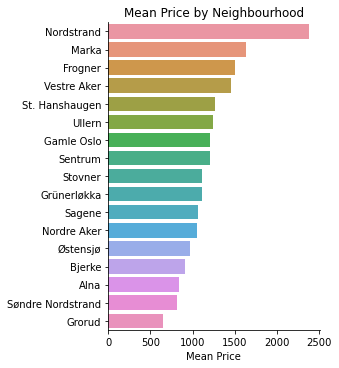

In [19]:
(
    sns.catplot(
        data=price_by_nbhood.reset_index(), kind="bar", x="mean", y="neighbourhood"
    )
    .set_axis_labels(x_var="Mean Price", y_var="")
    .set(title="Mean Price by Neighbourhood")
)


 ## Most expensive room types 

In [21]:
# exclude prices of 0
price_by_roomtype = (
    listings_red.groupby("room_type")
    .agg({"price": ["min", "mean", "max"]})
    .droplevel(level=0, axis="columns")
    .sort_values(by="mean", ascending=False)
)
price_by_roomtype

,min,mean,max
room_type,,,
Entire home/apt,100.0,1397.055786,87140.0
Private room,170.0,738.355799,10000.0
Shared room,235.0,634.888889,2000.0
Hotel room,400.0,431.666667,475.0


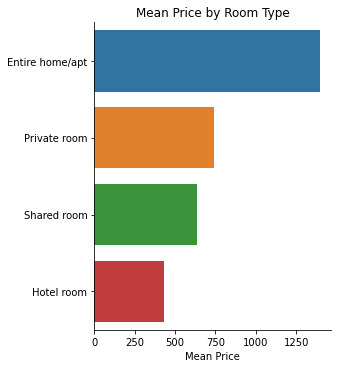

In [22]:
(
    sns.catplot(
        data=price_by_roomtype.reset_index(), kind="bar", x="mean", y="room_type"
    )
    .set_axis_labels(x_var="Mean Price", y_var="")
    .set(title="Mean Price by Room Type")
)


 ## Are rooms with more reviews more or less expensive?

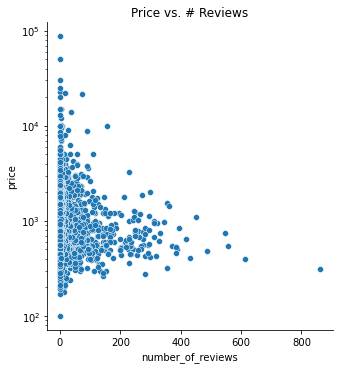

In [23]:
sns.relplot(
    kind="scatter",
    data=listings_red,
    x="number_of_reviews",
    y="price",
).set(yscale="log", title="Price vs. # Reviews")
